In [2]:
import pandas as pd
from collections import defaultdict

labels = pd.read_csv("F:/AI Project/churn-retention-platform/data/raw/train.csv")

# Read ONLY transaction_date to get max date
date_col = pd.read_csv(
    "F:/AI Project/churn-retention-platform/data/raw/transactions.csv",
    usecols=["transaction_date"],
    dtype={"transaction_date": "int32"}
)

latest_date = pd.to_datetime(
    date_col["transaction_date"].max(),
    format="%Y%m%d"
)

cutoff_30 = latest_date - pd.Timedelta(days=30)

del date_col  # free memory

agg = defaultdict(lambda: {
    "total_amount_paid": 0.0,
    "total_plan_days": 0,
    "num_transactions": 0,
    "num_cancellations": 0
})

chunk_iter = pd.read_csv(
    "../data/raw/transactions.csv",
    usecols=[
        "msno",
        "transaction_date",
        "actual_amount_paid",
        "payment_plan_days",
        "is_cancel"
    ],
    dtype={
        "msno": "category",
        "transaction_date": "int32",
        "actual_amount_paid": "float32",
        "payment_plan_days": "int16",
        "is_cancel": "int8"
    },
    chunksize=500_000
)

for chunk in chunk_iter:

    # Convert date only for the chunk
    chunk["transaction_date"] = pd.to_datetime(
        chunk["transaction_date"],
        format="%Y%m%d"
    )

    # Filter to 30-day window early
    chunk = chunk[chunk["transaction_date"] >= cutoff_30]

    # Aggregate row by row (fast enough at chunk scale)
    for row in chunk.itertuples(index=False):
        user = row.msno

        agg[user]["total_amount_paid"] += row.actual_amount_paid
        agg[user]["total_plan_days"] += row.payment_plan_days
        agg[user]["num_transactions"] += 1
        agg[user]["num_cancellations"] += row.is_cancel

    del chunk  # free memory
    

features_tx_30 = (
    pd.DataFrame.from_dict(agg, orient="index")
      .reset_index()
      .rename(columns={"index": "msno"})
)

dataset_v1 = labels.merge(
    features_tx_30,
    on="msno",
    how="left"
)

dataset_v1.fillna(0, inplace=True)


dataset_v1.groupby("is_churn")[
    ["total_amount_paid", "num_transactions", "num_cancellations"]
].mean()





,total_amount_paid,num_transactions,num_cancellations
is_churn,,,
0,140.126791,1.089698,0.015385
1,65.831403,0.516472,0.261962


In [8]:
import pandas as pd
from collections import defaultdict

labels = pd.read_csv("F:/AI Project/churn-retention-platform/data/raw/train.csv")

# Read ONLY transaction_date to get max date
date_col = pd.read_csv(
    "F:/AI Project/churn-retention-platform/data/raw/transactions.csv",
    usecols=["transaction_date"],
    dtype={"transaction_date": "int32"}
)

latest_date = pd.to_datetime(
    date_col["transaction_date"].max(),
    format="%Y%m%d"
)

cutoff_30 = latest_date - pd.Timedelta(days=30)

del date_col  # free memory

agg = defaultdict(lambda: {
    "total_amount_paid": 0.0,
    "total_plan_days": 0,
    "num_transactions": 0,
    "num_cancellations": 0
})

chunk_iter = pd.read_csv(
    "../data/raw/transactions.csv",
    usecols=[
        "msno",
        "transaction_date",
        "actual_amount_paid",
        "payment_plan_days",
        "is_cancel"
    ],
    dtype={
        "msno": "category",
        "transaction_date": "int32",
        "actual_amount_paid": "float32",
        "payment_plan_days": "int16",
        "is_cancel": "int8"
    },
    chunksize=500_000
)

for chunk in chunk_iter:

    # Convert date only for the chunk
    chunk["transaction_date"] = pd.to_datetime(
        chunk["transaction_date"],
        format="%Y%m%d"
    )

    # Filter to 30-day window early
    chunk = chunk[chunk["transaction_date"] >= cutoff_30]

    # Aggregate row by row (fast enough at chunk scale)
    for row in chunk.itertuples(index=False):
        user = row.msno

        agg[user]["total_amount_paid"] += row.actual_amount_paid
        agg[user]["total_plan_days"] += row.payment_plan_days
        agg[user]["num_transactions"] += 1
        agg[user]["num_cancellations"] += row.is_cancel

    del chunk  # free memory
    

features_tx_30 = (
    pd.DataFrame.from_dict(agg, orient="index")
      .reset_index()
      .rename(columns={"index": "msno"})
)

dataset_v1 = labels.merge(
    features_tx_30,
    on="msno",
    how="left"
)

dataset_v1.fillna(0, inplace=True)


correlation = dataset_v1['num_cancellations'].corr(dataset_v1['is_churn'])

print(f"The correlation between Column_A and Column_B is: {correlation}")

The correlation between Column_A and Column_B is: 0.3457866130834905


In [ ]:
import pandas as pd

transactions = pd.read_csv("F:/AI Project/churn-retention-platform/data/raw/train.csv")
transactions['transaction_date'] = pd.to_datetime(
    transactions['transaction_date'], format='%Y%m%d'
)

T = transactions['transaction_date'].quantile(0.80)
T


In [11]:
import pandas as pd

transactions = pd.read_csv(
    "F:/AI Project/churn-retention-platform/data/raw/transactions.csv",
    usecols=[
        "msno",
        "transaction_date",
        "actual_amount_paid",
        "payment_plan_days",
        "is_cancel"
    ],
    dtype={
        "msno": "category",
        "actual_amount_paid": "float32",
        "payment_plan_days": "int16",
        "is_cancel": "int8"
    }
)

transactions["transaction_date"] = pd.to_datetime(
    transactions["transaction_date"],
    format="%Y%m%d",
    cache=True
)

T = transactions["transaction_date"].quantile(0.80)
T


Timestamp('2016-10-27 00:00:00')

In [14]:
import pandas as pd

transactions = pd.read_csv(
    "F:/AI Project/churn-retention-platform/data/raw/transactions.csv",
    usecols=[
        "msno",
        "transaction_date",
        "actual_amount_paid",
        "payment_plan_days",
        "is_cancel"
    ],
    dtype={
        "msno": "category",
        "actual_amount_paid": "float32",
        "payment_plan_days": "int16",
        "is_cancel": "int8"
    }
)

transactions["transaction_date"] = pd.to_datetime(
    transactions["transaction_date"],
    format="%Y%m%d",
    cache=True
)

# Storing 80th percentile date
T = transactions["transaction_date"].quantile(0.80)

feature_start = T - pd.Timedelta(days=60)
feature_end   = T

# Taking data from 80 percentile time only
tx_features = transactions[
    (transactions["transaction_date"] >= feature_start) &
    (transactions["transaction_date"] <  feature_end)
]

# churn label start & end time calculation
label_start = T
label_end   = T + pd.Timedelta(days=30)

# Taking label data as last 30 days
tx_label = transactions[
    (transactions["transaction_date"] >= label_start) &
    (transactions["transaction_date"] <= label_end)
]

# Ascertaining all users who have transaction in the label time period -Against these only can predictions be made
active_users = pd.Index(tx_label["msno"].unique())
                        
# Ascertaining all users who have transaction in the 80%ile period
all_users = pd.Index(transactions["msno"].unique())

# 
labels = pd.DataFrame({
    "msno": all_users,
    "is_churn": (~all_users.isin(active_users)).astype("int8")
})

#
features = (
    tx_features
    .groupby("msno", observed=True)
    .agg(
        total_amount_paid=("actual_amount_paid", "sum"),
        num_transactions=("transaction_date", "count"),
        num_cancellations=("is_cancel", "sum"),
        total_plan_days=("payment_plan_days", "sum")
    )
    .reset_index()
)

#
dataset = labels.merge(features, on="msno", how="left")

# Can't replace every column's NaN with 0 as some are categorical like msno
feature_cols = [
    "total_amount_paid",
    "num_transactions",
    "num_cancellations",
    "total_plan_days"
]

dataset[feature_cols] = dataset[feature_cols].fillna(0)

#
dataset.groupby("is_churn")[[
    "total_amount_paid",
    "num_transactions",
    "num_cancellations"
]].mean()



,total_amount_paid,num_transactions,num_cancellations
is_churn,,,
0,205.521881,1.589672,0.019136
1,22.736139,0.190013,0.025261


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

transactions = pd.read_csv(
    "F:/AI Project/churn-retention-platform/data/raw/transactions.csv",
    usecols=[
        "msno",
        "transaction_date",
        "actual_amount_paid",
        "payment_plan_days",
        "is_cancel"
    ],
    dtype={
        "msno": "category",
        "actual_amount_paid": "float32",
        "payment_plan_days": "int16",
        "is_cancel": "int8"
    }
)

transactions["transaction_date"] = pd.to_datetime(
    transactions["transaction_date"],
    format="%Y%m%d",
    cache=True
)

# Storing 80th percentile date
T = transactions["transaction_date"].quantile(0.80)

feature_start = T - pd.Timedelta(days=60)
feature_end   = T

# Taking data from 80 percentile time only
tx_features = transactions[
    (transactions["transaction_date"] >= feature_start) &
    (transactions["transaction_date"] <  feature_end)
]

# churn label start & end time calculation
label_start = T
label_end   = T + pd.Timedelta(days=30)

# Taking label data as last 30 days
tx_label = transactions[
    (transactions["transaction_date"] >= label_start) &
    (transactions["transaction_date"] <= label_end)
]

# Ascertaining all users who have transaction in the label time period -Against these only can predictions be made
active_users = pd.Index(tx_label["msno"].unique())
                        
# Ascertaining all users who have transaction in the 80%ile period
all_users = pd.Index(transactions["msno"].unique())

# 
labels = pd.DataFrame({
    "msno": all_users,
    "is_churn": (~all_users.isin(active_users)).astype("int8")
})

#
features = (
    tx_features
    .groupby("msno", observed=True)
    .agg(
        total_amount_paid=("actual_amount_paid", "sum"),
        num_transactions=("transaction_date", "count"),
        num_cancellations=("is_cancel", "sum"),
        total_plan_days=("payment_plan_days", "sum")
    )
    .reset_index()
)

#
dataset = labels.merge(features, on="msno", how="left")

# Can't replace every column's NaN with 0 as some are categorical like msno
feature_cols = [
    "total_amount_paid",
    "num_transactions",
    "num_cancellations",
    "total_plan_days"
]

dataset[feature_cols] = dataset[feature_cols].fillna(0)

# Differentiating X & Y columns to start training & validation
X = dataset.drop(columns=["msno", "is_churn"])
y = dataset["is_churn"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

model.fit(X_train, y_train)

# Calculating probability of churn/NOT
y_val_proba = model.predict_proba(X_val)[:, 1]

# Calculating ROC-AUC Curve by comparing against actual labelled results (y_val) & model predicted value (y_val_proba)
roc_auc = roc_auc_score(y_val, y_val_proba)
roc_auc


0.8839545341206348

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

transactions = pd.read_csv(
    "F:/AI Project/churn-retention-platform/data/raw/transactions.csv",
    usecols=[
        "msno",
        "transaction_date",
        "actual_amount_paid",
        "payment_plan_days",
        "is_cancel"
    ],
    dtype={
        "msno": "category",
        "actual_amount_paid": "float32",
        "payment_plan_days": "int16",
        "is_cancel": "int8"
    }
)

transactions["transaction_date"] = pd.to_datetime(
    transactions["transaction_date"],
    format="%Y%m%d",
    cache=True
)

# Storing 80th percentile date
T = transactions["transaction_date"].quantile(0.80)

feature_start = T - pd.Timedelta(days=60)
feature_end   = T

# Taking data from 80 percentile time only
tx_features = transactions[
    (transactions["transaction_date"] >= feature_start) &
    (transactions["transaction_date"] <  feature_end)
]

# churn label start & end time calculation
label_start = T
label_end   = T + pd.Timedelta(days=30)

# Taking label data as last 30 days
tx_label = transactions[
    (transactions["transaction_date"] >= label_start) &
    (transactions["transaction_date"] <= label_end)
]

# Ascertaining all users who have transaction in the label time period -Against these only can predictions be made
active_users = pd.Index(tx_label["msno"].unique())
                        
# Ascertaining all users who have transaction in the 80%ile period
all_users = pd.Index(transactions["msno"].unique())

# 
labels = pd.DataFrame({
    "msno": all_users,
    "is_churn": (~all_users.isin(active_users)).astype("int8")
})

#
features = (
    tx_features
    .groupby("msno", observed=True)
    .agg(
        total_amount_paid=("actual_amount_paid", "sum"),
        num_transactions=("transaction_date", "count"),
        num_cancellations=("is_cancel", "sum"),
        total_plan_days=("payment_plan_days", "sum")
    )
    .reset_index()
)

#
dataset = labels.merge(features, on="msno", how="left")

# Can't replace every column's NaN with 0 as some are categorical like msno
feature_cols = [
    "total_amount_paid",
    "num_transactions",
    "num_cancellations",
    "total_plan_days"
]

dataset[feature_cols] = dataset[feature_cols].fillna(0)

# 
dataset.groupby("is_churn")[[
    "num_transactions"
]].median()


,num_transactions
is_churn,
0,2.0
1,0.0


<Axes: >

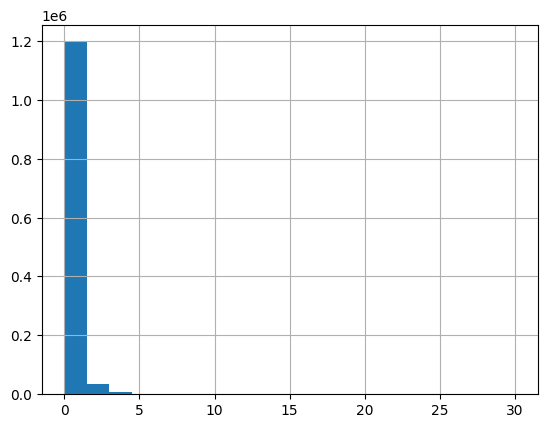

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

transactions = pd.read_csv(
    "F:/AI Project/churn-retention-platform/data/raw/transactions.csv",
    usecols=[
        "msno",
        "transaction_date",
        "actual_amount_paid",
        "payment_plan_days",
        "is_cancel"
    ],
    dtype={
        "msno": "category",
        "actual_amount_paid": "float32",
        "payment_plan_days": "int16",
        "is_cancel": "int8"
    }
)

transactions["transaction_date"] = pd.to_datetime(
    transactions["transaction_date"],
    format="%Y%m%d",
    cache=True
)

# Storing 80th percentile date
T = transactions["transaction_date"].quantile(0.80)

feature_start = T - pd.Timedelta(days=60)
feature_end   = T

# Taking data from 80 percentile time only
tx_features = transactions[
    (transactions["transaction_date"] >= feature_start) &
    (transactions["transaction_date"] <  feature_end)
]

# churn label start & end time calculation
label_start = T
label_end   = T + pd.Timedelta(days=30)

# Taking label data as last 30 days
tx_label = transactions[
    (transactions["transaction_date"] >= label_start) &
    (transactions["transaction_date"] <= label_end)
]

# Ascertaining all users who have transaction in the label time period -Against these only can predictions be made
active_users = pd.Index(tx_label["msno"].unique())
                        
# Ascertaining all users who have transaction in the 80%ile period
all_users = pd.Index(transactions["msno"].unique())

# 
labels = pd.DataFrame({
    "msno": all_users,
    "is_churn": (~all_users.isin(active_users)).astype("int8")
})

#
features = (
    tx_features
    .groupby("msno", observed=True)
    .agg(
        total_amount_paid=("actual_amount_paid", "sum"),
        num_transactions=("transaction_date", "count"),
        num_cancellations=("is_cancel", "sum"),
        total_plan_days=("payment_plan_days", "sum")
    )
    .reset_index()
)

#
dataset = labels.merge(features, on="msno", how="left")

# Can't replace every column's NaN with 0 as some are categorical like msno
feature_cols = [
    "total_amount_paid",
    "num_transactions",
    "num_cancellations",
    "total_plan_days"
]

dataset[feature_cols] = dataset[feature_cols].fillna(0)

# 
dataset.groupby("is_churn")[[
    "num_transactions"
]].median()

dataset[dataset.is_churn == 1]["num_transactions"].hist(bins=20)